<a href="https://colab.research.google.com/github/henrique97-hub/ia_testeCamera/blob/main/Teste_Camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,093 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [2]:
!pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=03b852dc6d5e82a244f9878b23c85db63830314d82634e14fabf8a97b191cd0c
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [3]:
!pip install pillow


In [4]:
!sudo apt-get install tesseract-ocr-[por]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'tesseract-ocr-oci' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-ori' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-osd' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-pan' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-pol' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-por' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-pus' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-ron' for regex 'tesseract-ocr-[por]'
Note, selecting 'tesseract-ocr-rus' for regex 'tesseract-ocr-[por]'
tesseract-ocr-osd is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-osd set to manually installed.
The following NEW packages will be installed:
  tesseract-ocr-oci tesseract-ocr-ori tesseract-ocr-pan tesseract-ocr-pol
  tesseract-ocr-por tesseract-ocr-pus tesseract-ocr-r

In [5]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image, ImageEnhance, ImageFilter
except ImportError:
 import Image

In [6]:
# Teste1

# imagem =  Image.open('/content/camera1.PNG')
# img = imagem.convert('RGBA')
# img.save('camera1pb.PNG')
# im = Image.open('camera1pb.PNG')
# im = im.filter(ImageFilter.MedianFilter())
# enhancer = ImageEnhance.Contrast(im)
# im = enhancer.enhance(2)
# im = im.convert('1')
# im.save('temp2.jpg')
# text = pytesseract.image_to_string(Image.open('temp2.jpg'))
# print(text)

In [7]:
# extractedInformation = pytesseract.image_to_string(Image.open('/content/texto1.jpeg'))
# print(extractedInformation)

In [8]:
# !pip install opencv

In [9]:
import cv2

In [114]:
# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('ft.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray, (3,3), 0) 
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

# Morph open to remove noise and invert image - tirar os comentarios, para ver os filtros
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) 
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1) 
#invert = 255 - opening 


# Perform text extraction
data = pytesseract.image_to_string('ft.PNG', lang='por', config='--psm 6',)
print(data)

# Testes Henrique
#cv2_imshow(invert)
#cv2_imshow(opening)
#cv2_imshow(kernel)

 #cv2.imshow('thresh', thresh)
 #cv2.imshow('opening', opening)
 #cv2.imshow('invert', invert)
 #cv2.waitKey()

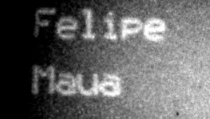

In [111]:
# Vizualização de imagem
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('ft.PNG', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


In [115]:
 !tesseract --list-langs

List of available languages (10):
eng
por
oci
pus
pol
rus
ron
pan
ori
osd
